# SIFT-scale invarient feature transform

In [1]:
pip install --user opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread("nature1.jpg")

In [9]:
rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
grey=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [13]:
#scale invariance
sc_iv=cv2.pyrDown(rgb)
sc_iv2=cv2.pyrDown(sc_iv)
num_rows,num_cols=sc_iv2.shape[:2]
print(sc_iv2)

[[[  2  83 130]
  [  1  85 130]
  [  1  89 130]
  ...
  [  5  34 133]
  [  5  34 133]
  [  6  34 131]]

 [[  1  86 132]
  [  1  88 132]
  [  1  90 132]
  ...
  [  6  33 132]
  [  6  34 133]
  [  5  34 131]]

 [[  1  92 134]
  [  1  92 133]
  [  0  92 133]
  ...
  [  6  34 133]
  [  6  35 133]
  [  5  36 131]]

 ...

 [[ 53  45  44]
  [ 57  46  45]
  [ 63  49  49]
  ...
  [159  61  30]
  [154  60  25]
  [145  56  20]]

 [[ 67  54  53]
  [ 71  55  54]
  [ 74  57  57]
  ...
  [166  63  34]
  [159  63  33]
  [154  62  33]]

 [[ 71  58  59]
  [ 75  58  58]
  [ 76  59  59]
  ...
  [174  61  29]
  [177  65  30]
  [169  66  32]]]


In [6]:
cv2.imshow("Original",img)
cv2.imshow("First scale",sc_iv)
cv2.imshow("Scale",sc_iv2)
cv2.waitKey(0)


-1

In [14]:
#Rotational invariance
rot_iv=cv2.getRotationMatrix2D((num_cols/2,num_rows/2,),90,0.5)


In [16]:
#Affine transformation
aff=cv2.warpAffine(sc_iv,rot_iv,(num_cols,num_rows))

In [21]:
rot_gray=cv2.cvtColor(aff,cv2.COLOR_RGB2GRAY)

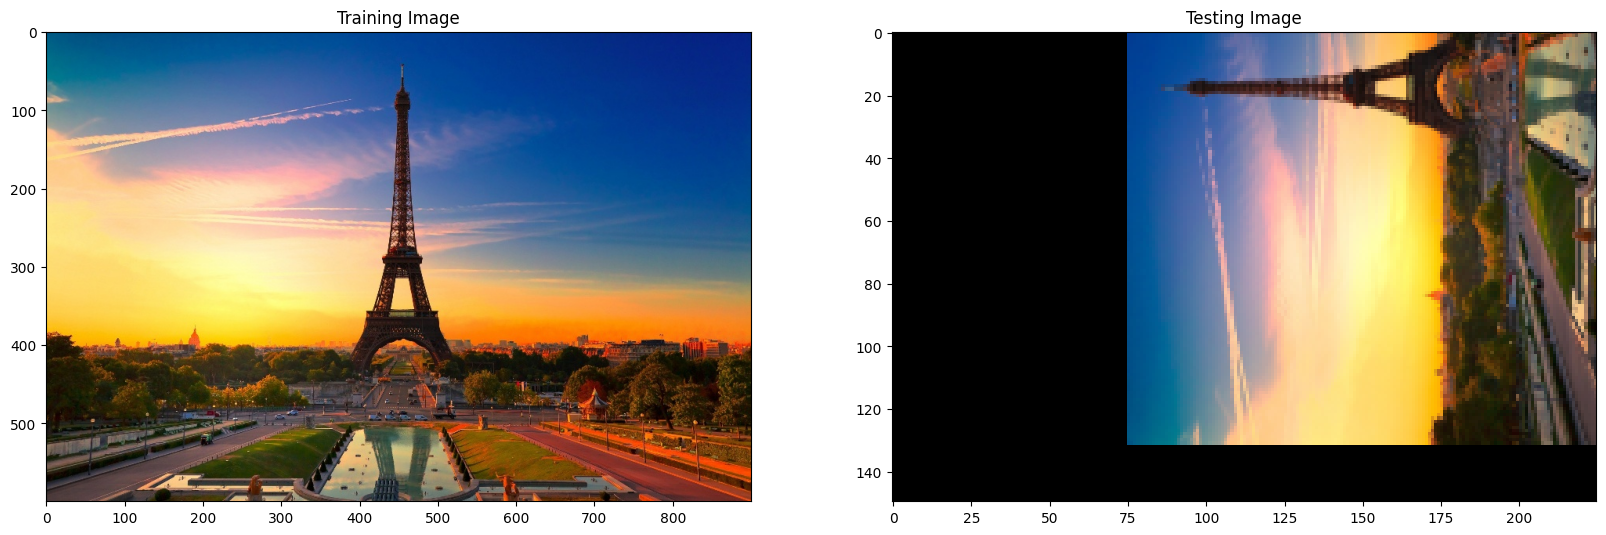

In [17]:
fx,plots=plt.subplots(1,2,figsize=(20,10))
plots[0].set_title("Training Image")
plots[0].imshow(rgb)
plots[1].set_title("Testing Image")
plots[1].imshow(aff)

In [18]:
sift=cv2.xfeatures2d.SIFT_create()

In [22]:
train_kp,train_des=sift.detectAndCompute(grey,None)
test_kp,test_des=sift.detectAndCompute(rot_gray,None)

In [23]:
kp_wo_size=np.copy(rgb)
kp_w_size=np.copy(rgb)

In [25]:
cv2.drawKeypoints(rgb,train_kp,kp_wo_size,color=(0,255,0))
cv2.drawKeypoints(rgb,train_kp,kp_w_size,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

array([[[  2,  80, 129],
        [  3,  81, 130],
        [  1,  82, 129],
        ...,
        [  8,  32, 132],
        [  7,  31, 131],
        [  6,  30, 130]],

       [[  3,  81, 130],
        [  1,  81, 130],
        [  2,  83, 130],
        ...,
        [  9,  33, 133],
        [  8,  32, 132],
        [  8,  32, 132]],

       [[  2,  82, 131],
        [  2,  82, 131],
        [  2,  83, 130],
        ...,
        [  7,  33, 130],
        [  7,  33, 130],
        [  8,  34, 131]],

       ...,

       [[ 68,  56,  60],
        [ 71,  59,  61],
        [ 72,  57,  60],
        ...,
        [169,  66,  33],
        [161,  58,  27],
        [155,  55,  23]],

       [[ 68,  57,  63],
        [ 71,  59,  63],
        [ 72,  57,  60],
        ...,
        [221,  86,  31],
        [206,  72,  19],
        [195,  64,  12]],

       [[ 67,  56,  62],
        [ 69,  58,  62],
        [ 70,  55,  60],
        ...,
        [237,  85,  20],
        [234,  84,  23],
        [237,  89,  27]]

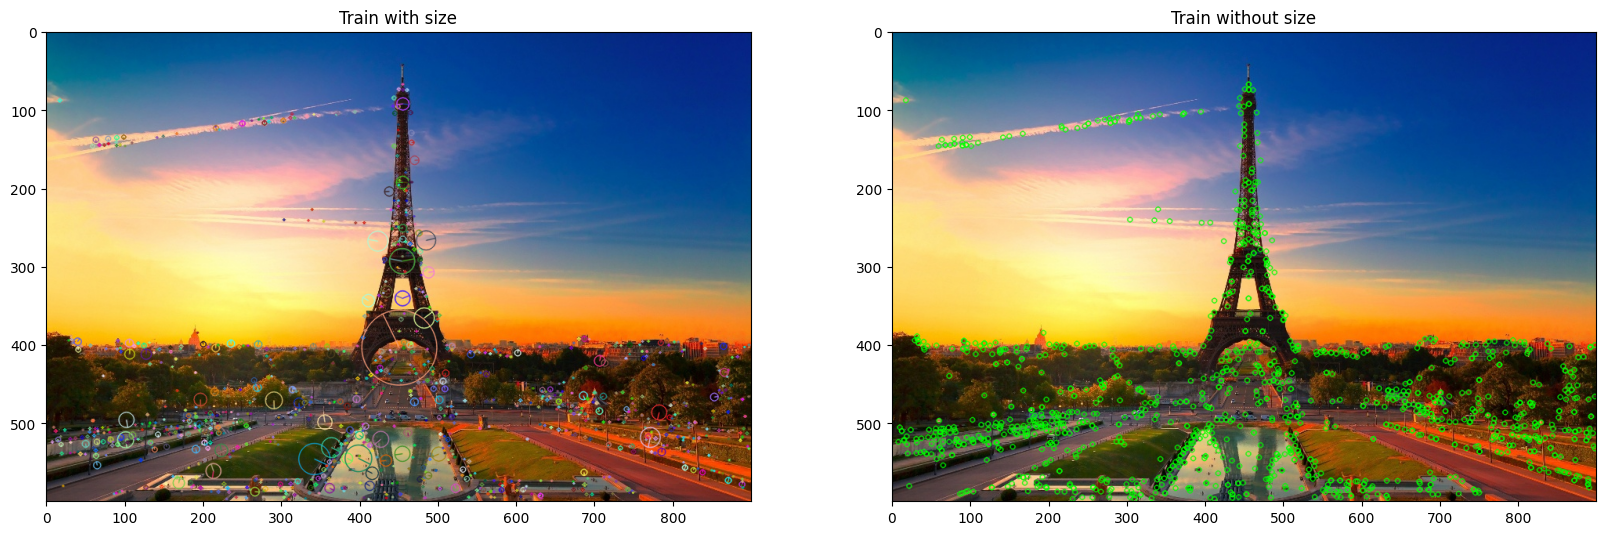

In [30]:
fx,plots=plt.subplots(1,2,figsize=(20,10))
plots[0].set_title("Train with size")
plots[0].imshow(kp_w_size,cmap='gray')
plots[1].set_title("Train without size")
plots[1].imshow(kp_wo_size,cmap='gray')

In [27]:
#Brute force matcher
bfm=cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)

In [28]:
match=bfm.match(train_des,test_des)

In [29]:
match=sorted(match,key=lambda x:x.distance)

In [31]:
result=cv2.drawMatches(rgb,train_kp,rot_gray,test_kp,match,rot_gray,flags=2)

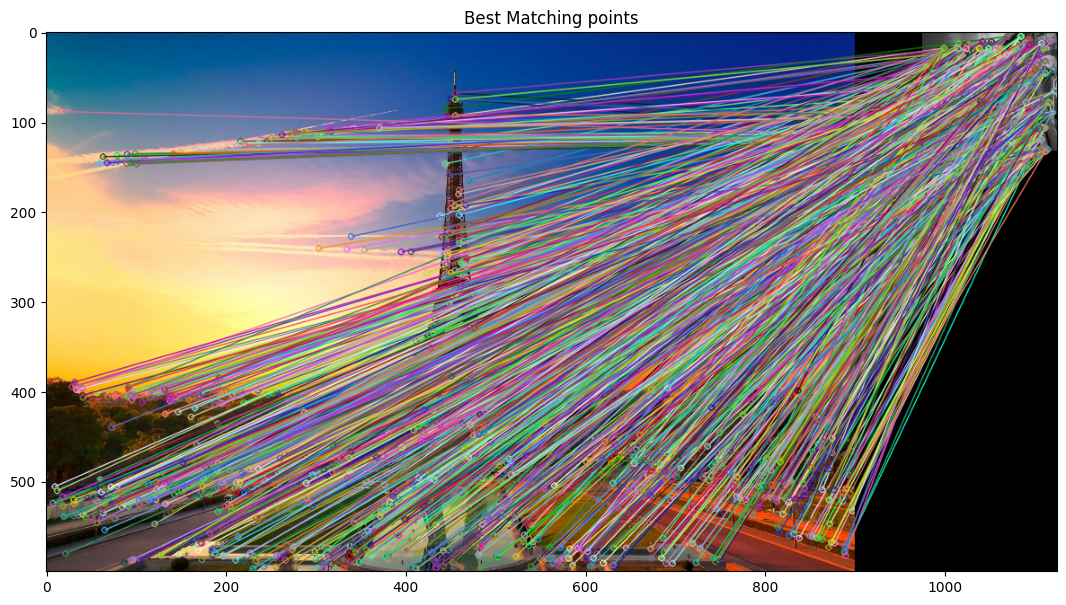

In [33]:
plt.rcParams['figure.figsize']=[14.0,7.0]
plt.title('Best Matching points')
plt.imshow(result)
plt.show()